In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [15]:
#define variables
c0 = 0.1 # (m/s)
x = np.linspace(-3,1,200) #position
t = np.linspace(0,1.3,200) #time
dt = np.diff(t)
dt = dt[0] # dt element
n = 200 #iterations

In [16]:
# Create u and c arrays of same length as x
u = np.zeros_like(x)
c = np.zeros_like(x)

# Linear drop between x = -2.5 and x = 0
c = 0.1 - (0.9/2.5)*x

# Set vals <-2.5 equal to 1m/s and vals >0 equal to 0.1m/s
for i in range(0,len(x)):
    if(x[i] > 0):
        c[i] = 0.1
    elif(x[i] < -2.5):
        c[i] = 1
u = 2*(c - c0) #u when t=0
u0 = u #tmp 
c0 = c #tmp


u_iter  = np.zeros((n,len(x)))
c_iter = np.zeros((n,len(x)))
u_iter[0,:] = u0  #stores each iteration of u array
c_iter[0,:] = c0  #stores each iteration of c array


R_pos = u0 + 2*c0
R_neg = u0 - 2*c0
# 100 iterations of dt  interpolations
for i in range(1,n):
    x_pos = x + (u+c)*dt # new x_pos array 
    x_neg = x + (u-c)*dt # new x_neg array
    
    R_pos = np.interp(x,x_pos,R_pos) #interpolate the value of R_pos at x values from 1st array
    R_neg = np.interp(x,x_neg,R_neg) # ""  "" R_neg "" 
    
    u = (R_pos + R_neg)/2
    c = (R_pos - R_neg)/4
    
    u_iter[i,:] = u
    c_iter[i,:] = c
    
    #u_iter/c_iter:  each row contains values of u/c for discrete points in x from -3,1
u_iter

array([[1.8, 1.8, 1.8, ..., 0. , 0. , 0. ],
       [1.8, 1.8, 1.8, ..., 0. , 0. , 0. ],
       [1.8, 1.8, 1.8, ..., 0. , 0. , 0. ],
       ...,
       [1.8, 1.8, 1.8, ..., 0. , 0. , 0. ],
       [1.8, 1.8, 1.8, ..., 0. , 0. , 0. ],
       [1.8, 1.8, 1.8, ..., 0. , 0. , 0. ]])

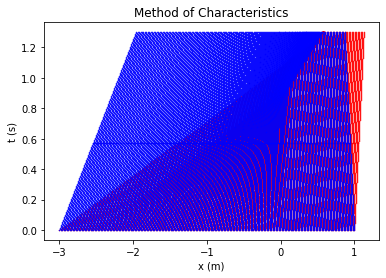

In [31]:
x_char = x
plt.title("Method of Characteristics")
plt.xlabel("x (m)")
plt.ylabel("t (s)")
#Pos Characteristics
for i in range(0,len(t)):
    plt.plot(x_char,0*x_char + t[i],"r.",ms="0.1")
    u = np.interp(x_char,x,u_iter[i,:])
    c = np.interp(x_char,x,c_iter[i,:])
    U = u + c
    x_char = x_char + U*dt
x_char = x
#Neg characteristics
for i in range(0,len(t)):
    plt.plot(x_char,0*x_char + t[i],"b.",ms="0.1")
    u = np.interp(x_char,x,u_iter[i,:])
    c = np.interp(x_char,x,c_iter[i,:])
    U = u - c
    x_char = x_char + U*dt
    

    
    

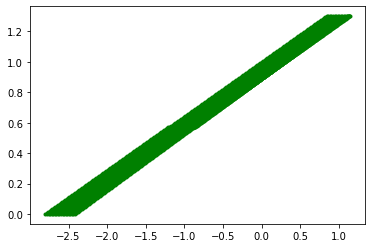

In [28]:
#Theoretical characteristics
x_char = x
c = np.interp(x_char, x, c_iter[0,:])
for i in range(0,20):
    if(i == len(t-11)):
        break
    else:
        theo = 3*c[i+10] - 2*c_iter[0,-1]
        plt.plot(t*theo + x_char[i+10],t,'g.')
